In [1]:
# import necessary packages
import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras import optimizers

Using TensorFlow backend.
/home/mohamed-mossad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mohamed-mossad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mohamed-mossad/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mohamed-mossad/.local/lib/python3.6

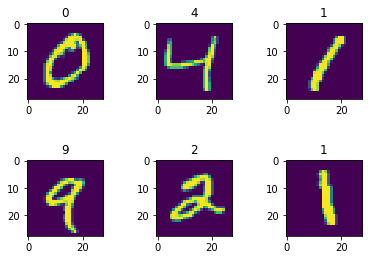

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load dataset
#FS
# show samples of the dataset
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    plt.imshow(x_train[i])
    plt.title(y_train[i])

In [3]:
# more data exploration
print('trainig tensor shape {}'.format(x_train.shape))
print('Test data shape {}'.format(x_test.shape))
print('label tensor shape {} '.format(y_train.shape))

trainig tensor shape (60000, 28, 28)
Test data shape (10000, 28, 28)
label tensor shape (60000,) 


In [4]:
# data preprocessing 

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size) / 255.0
x_test = x_test.reshape(x_test.shape[0], image_vector_size) /255.0

# Convert y to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
# build the network
# create model
model = Sequential()

model.add(Dense(image_vector_size//2,
                input_shape=x_train[0].shape,
                activation='relu'))
'''model.add(Dense(image_vector_size//4,
                activation='relu'))
model.add(Dense(image_vector_size//8,
               activation='relu'))
               ''' 

model.add(Dense(num_classes,
                activation='softmax'))
# Compile model
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 392)               307720    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3930      
Total params: 311,650
Trainable params: 311,650
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
EPOCHES=2
BATCH_SIZE=4
history=model.fit(x_train, y_train,
                  validation_data=(x_test, y_test), 
                  epochs=EPOCHES, 
                  batch_size=BATCH_SIZE,
                  verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 49s 821us/step - loss: 0.3030 - accuracy: 0.9154 - val_loss: 0.1757 - val_accuracy: 0.9478
Epoch 2/2
60000/60000 [==============================] - 50s 829us/step - loss: 0.1484 - accuracy: 0.9574 - val_loss: 0.1178 - val_accuracy: 0.9658


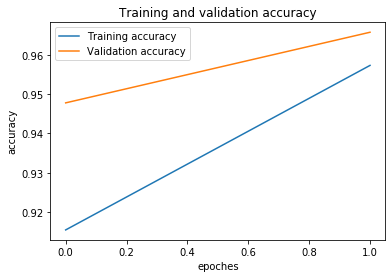

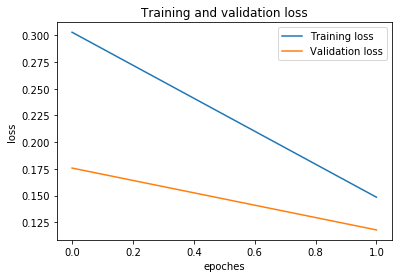

In [7]:
# Visualize loss and accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.legend()

In [8]:
# model evaluation
test_eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.11776684442646801
Test accuracy: 0.9657999873161316


In [19]:
# more evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
predictions = model.predict(x_test)
print("Classification Report :\n {} \n Model Acurracy = {}".format(classification_report(y_test
                                                                                         ,predictions.argmax()),
                                                                 accuracy_score(y_test,predictions.argmax())))

TypeError: Singleton array 4400 cannot be considered a valid collection.

Text(0.5, 1, 'Confusion Matrix')

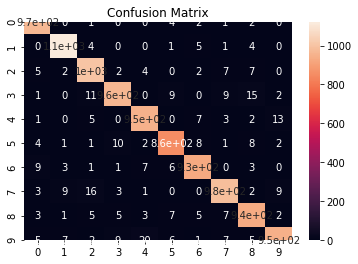

In [16]:
# confusion matrix
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt     

ax= plt.subplot()
cm = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1)), range(10),range(10))

sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_title('Confusion Matrix')

In [ ]:
# neural network parameters to tune for best performance
'''
1. number of hidden layers (many layers causes overfitting , very few layers underfitting)
2. number of neurons per layers (many neurons overfitting , very few underfitting)
3. activation function (you may change activation function but relu and sigmoid are good for many problems)
4. loss function (choose prober / sutiable loss function)
5. optimizer learning rate (very large rate >>> model may overshoot global minimum , and very low value model may stuck is local minimum)
6. batch size
7. number of epoches
8. also make sure features are scalled this has huge effect on performance
''' 